### Most Streamed Spotify Songs 2024

[Key Features]
- Track Name: Name of the song.

- Album Name: Name of the album the song belongs to.

- Artist: Name of the artist(s) of the song.

- Release Date: Date when the song was released.

- All Time Rank: Ranking of the song based on its all-time popularity.

- Track Score: Score assigned to the track based on various factors.

- Spotify Streams: Total number of streams on Spotify.

- Spotify Playlist Count: Number of Spotify playlists the song is included in.

- Spotify Playlist Reach: Reach of the song across Spotify playlists.

- Spotify Popularity: Popularity score of the song on Spotify.


[Potential Use Cases]
- Music Analysis: Analyze trends in audio features to understand popular song characteristics.
- Platform Comparison: Compare song popularity across different music platforms.
- Artist Impact: Study the relationship between artist attributes and song success.
- Temporal Trends: Identify changes in music attributes and preferences over time.
- Cross-Platform Presence: Investigate song performance across various streaming services.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
billDF=pd.read_csv(r'C:\Users\kdp\Desktop\KDT\EX_PANDAS06\hot-100-current.csv',encoding = 'cp949')

In [133]:
billDF.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen,1.0,1,3
1,2024-06-08,2,Not Like Us,Kendrick Lamar,2.0,1,4
2,2024-06-08,3,Million Dollar Baby,Tommy Richman,3.0,2,5
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey,4.0,3,7
4,2024-06-08,5,Espresso,Sabrina Carpenter,6.0,4,7


In [134]:
billDF.drop('last_week',axis=1,inplace=True)
billDF.drop('peak_pos',axis=1,inplace=True)
billDF.drop('wks_on_chart',axis=1,inplace=True)
billDF

,chart_week,current_week,title,performer
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen
1,2024-06-08,2,Not Like Us,Kendrick Lamar
2,2024-06-08,3,Million Dollar Baby,Tommy Richman
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey
4,2024-06-08,5,Espresso,Sabrina Carpenter
...,...,...,...,...
343595,1958-08-04,96,Over And Over,Thurston Harris
343596,1958-08-04,97,I Believe In You,Robert & Johnny
343597,1958-08-04,98,Little Serenade,The Ames Brothers
343598,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams


In [135]:
bill=billDF[:2300]
bill['score']=0
bill['title']=bill['title'].str.lower()

C:\Users\kdp\AppData\Local\Temp\ipykernel_10144\1433722536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['score']=0
C:\Users\kdp\AppData\Local\Temp\ipykernel_10144\1433722536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['title']=bill['title'].str.lower()


In [136]:
for row in bill.index:
    bill.loc[row,'score']=101-bill.loc[row,'current_week']

In [137]:
bill_title=bill['title'].value_counts()
bill_title

title
feather                     23
stick season                23
agora hills                 23
greedy                      23
lovin on me                 23
                            ..
stranger                     1
wildflower and barley        1
scared of my guitar          1
best for me                  1
dj play a christmas song     1
Name: count, Length: 429, dtype: int64

In [138]:
bill_score=pd.DataFrame(index=['score'])
for name in bill_title.index:
    bill_score[name]=0
    for row in bill.index:
        if bill.loc[row,'title']==name:
            bill_score[name]=bill_score[name]+bill.loc[row,'score']

C:\Users\kdp\AppData\Local\Temp\ipykernel_10144\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\kdp\AppData\Local\Temp\ipykernel_10144\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\kdp\AppData\Local\Temp\ipykernel_10144\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

In [139]:
bill_score=bill_score.T
bill_score

,score
feather,1487
stick season,1930
agora hills,1862
greedy,1968
lovin on me,2142
...,...
stranger,26
wildflower and barley,13
scared of my guitar,11
best for me,8


In [140]:
dataDF=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='cp1252',thousands=',')

In [141]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [142]:
dataDF.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [143]:
spotify=dataDF[['Track','Artist','Release Date','All Time Rank','Track Score','Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity']]
spotify['Track']=spotify['Track'].str.lower()
spotify.set_index('Track',inplace=True)

C:\Users\kdp\AppData\Local\Temp\ipykernel_10144\2170424451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['Track']=spotify['Track'].str.lower()


In [144]:
dataDF=bill_score.join(spotify)
dataDF

,score,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
feather,1487,Sabrina Carpenter,3/17/2023,673.0,58.8,4.889800e+08,32825.0,79636817.0,84.0
stick season,1930,Noah Kahan,7/8/2022,342.0,82.6,9.658652e+08,113676.0,169323128.0,86.0
agora hills,1862,Doja Cat,9/22/2023,99.0,152.8,5.096531e+08,66219.0,67521533.0,NaN
greedy,1968,Tate McRae,9/14/2023,18.0,293.7,1.258570e+09,105218.0,198845580.0,87.0
greedy,1968,Tate McRae,9/15/2023,2281.0,30.0,1.256102e+09,3984.0,2453761.0,NaN
...,...,...,...,...,...,...,...,...,...
stranger,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wildflower and barley,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scared of my guitar,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
best for me,8,Joyner Lucas,3/18/2024,2798.0,26.5,1.885256e+07,3014.0,3041643.0,NaN


In [145]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, feather to dj play a christmas song
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   score                   480 non-null    int64  
 1   Artist                  289 non-null    object 
 2   Release Date            289 non-null    object 
 3   All Time Rank           289 non-null    float64
 4   Track Score             289 non-null    float64
 5   Spotify Streams         286 non-null    float64
 6   Spotify Playlist Count  287 non-null    float64
 7   Spotify Playlist Reach  287 non-null    float64
 8   Spotify Popularity      174 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 37.5+ KB


In [146]:
dataDF.isna().sum()

score                       0
Artist                    191
Release Date              191
All Time Rank             191
Track Score               191
Spotify Streams           194
Spotify Playlist Count    193
Spotify Playlist Reach    193
Spotify Popularity        306
dtype: int64

In [147]:
dataDF.dropna(inplace=True)
dataDF

,score,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
feather,1487,Sabrina Carpenter,3/17/2023,673.0,58.8,4.889800e+08,32825.0,79636817.0,84.0
stick season,1930,Noah Kahan,7/8/2022,342.0,82.6,9.658652e+08,113676.0,169323128.0,86.0
greedy,1968,Tate McRae,9/14/2023,18.0,293.7,1.258570e+09,105218.0,198845580.0,87.0
lovin on me,2142,Jack Harlow,11/10/2023,6.0,410.1,6.706654e+08,105892.0,175421034.0,83.0
lose control,2148,Teddy Swims,6/23/2023,38.0,224.1,7.751352e+08,88239.0,180617454.0,87.0
...,...,...,...,...,...,...,...,...,...
jealous,47,Eyedress,12/6/2019,1615.0,36.5,7.894183e+08,170553.0,31361482.0,78.0
okay,27,JT,4/24/2024,2641.0,27.4,1.644611e+07,1966.0,36576049.0,65.0
easy,2,LE SSERAFIM,2/19/2024,455.0,72.4,1.418039e+08,7192.0,20908017.0,78.0
easy,2,DaniLeigh,11/30/2018,4403.0,19.9,4.180854e+07,7802.0,1222888.0,46.0


In [148]:
# [4] 컬럼별로 이상한 값 즉, 이상치 체크 및 시각화
dataDF.describe()

,score,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
count,174.000000,174.000000,174.000000,1.740000e+02,174.000000,1.740000e+02,174.000000
mean,466.137931,1163.982759,101.622989,3.911824e+08,42060.712644,6.260899e+07,72.459770
std,500.441150,1259.472284,111.041307,4.226111e+08,50908.912817,6.102916e+07,19.596688
min,2.000000,1.000000,19.900000,4.094651e+06,50.000000,4.935800e+04,1.000000
25%,96.000000,158.500000,35.400000,1.072148e+08,7199.750000,1.336212e+07,67.000000
50%,256.000000,670.500000,58.850000,2.195806e+08,23299.000000,3.886247e+07,78.000000
75%,683.250000,1700.500000,121.075000,5.324572e+08,55660.750000,9.742027e+07,84.000000
max,2148.000000,4403.000000,725.400000,2.382407e+09,269802.000000,2.623434e+08,96.000000


In [149]:
# 한글 폰트 설정 ->폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
font_file=r'C:\Windows\Fonts\batang.ttc'

# 폰트 패밀리
font_name= fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

# set_custonFont(r'C:\Windows\Fonts\batang.ttc')

In [150]:
dataDFcorr=dataDF.corr(numeric_only=True)
dataDFcorr

,score,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
score,1.000000,-0.279713,0.367480,0.384098,0.274883,0.435644,0.186105
All Time Rank,-0.279713,1.000000,-0.553529,-0.160891,-0.101161,-0.583622,-0.384388
Track Score,0.367480,-0.553529,1.000000,0.246246,0.216545,0.708760,0.369220
Spotify Streams,0.384098,-0.160891,0.246246,1.000000,0.788598,0.323349,0.108661
Spotify Playlist Count,0.274883,-0.101161,0.216545,0.788598,1.000000,0.204046,0.119932
Spotify Playlist Reach,0.435644,-0.583622,0.708760,0.323349,0.204046,1.000000,0.460380
Spotify Popularity,0.186105,-0.384388,0.369220,0.108661,0.119932,0.460380,1.000000


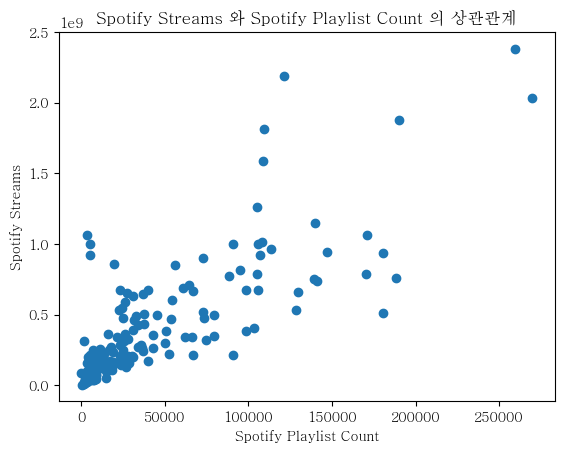

In [151]:
# Scatter plot 그리기
plt.scatter(dataDF['Spotify Playlist Count'], dataDF['Spotify Streams'])
plt.xlabel('Spotify Playlist Count')
plt.ylabel('Spotify Streams')
plt.title('Spotify Streams 와 Spotify Playlist Count 의 상관관계')

plt.show()

In [152]:
dataDF['Spotify Streams'].sort_values(ascending=False).head(10)

all of me                          2.382407e+09
cruel summer                       2.188247e+09
flowers                            2.031281e+09
kill bill                          1.873747e+09
all i want for christmas is you    1.810650e+09
idgaf                              1.583012e+09
greedy                             1.258570e+09
fast car                           1.145883e+09
paint the town red                 1.065399e+09
paint the town red                 1.065399e+09
Name: Spotify Streams, dtype: float64

In [153]:
value_counts = dataDF['Artist'].value_counts()
value_counts.head(10)

Artist
Billie Eilish     9
Taylor Swift      8
Dua Lipa          6
Zach Bryan        4
Peso Pluma        4
Travis Scott      4
SZA               3
Jelly Roll        3
Ariana Grande     3
Olivia Rodrigo    3
Name: count, dtype: int64

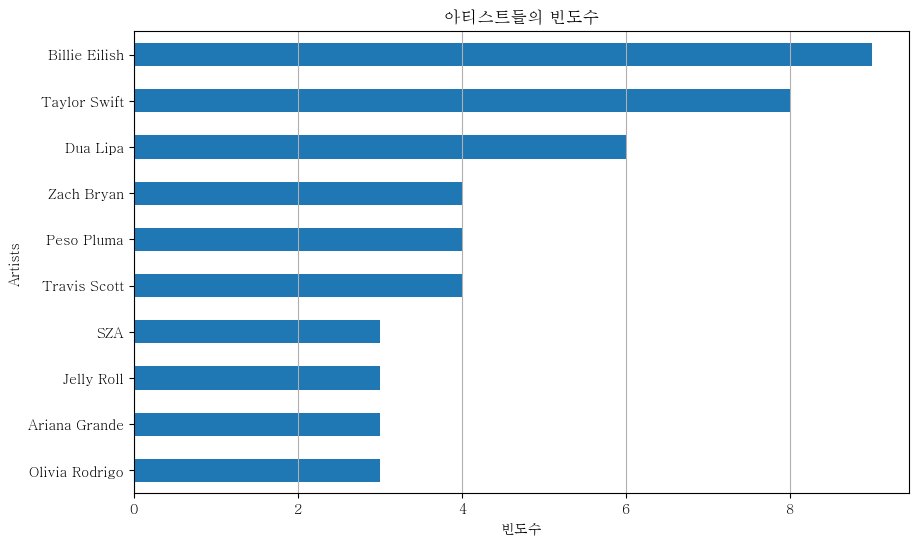

In [154]:
#  bar plot 생성

plt.figure(figsize=(10, 6))
value_counts.head(10).plot(kind='barh')

# 라벨 및 제목 추가
plt.xlabel('빈도수')
plt.ylabel('Artists')
plt.title('아티스트들의 빈도수')
plt.gca().invert_yaxis()   # 값이 높은 순서대로 출력
plt.grid(axis='x')
plt.show()

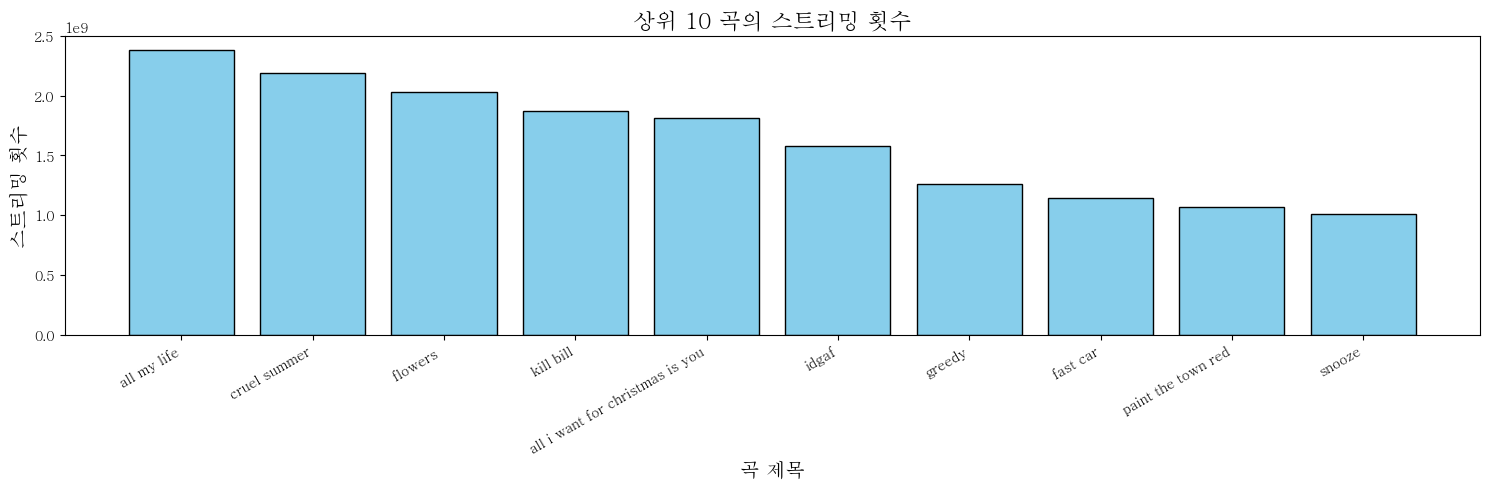

In [155]:
#  bar plot 생성
a=dataDF['Spotify Streams'].sort_values().head(10)
a.values
plt.figure(figsize=(15, 5))  # 그래프 크기를 더 크게 설정
plt.bar(['all my life', 'cruel summer', 'flowers ', 'kill bill', 'all i want for christmas is you',
       'idgaf', 'greedy', 'fast car', 'paint the town red',
       'snooze'],[2.382407e+09 ,2.188247e+09,2.031281e+09,1.873747e+09,1.810650e+09,1.583012e+09,1.258570e+09,
                  1.145883e+09,1.065399e+09,1.013351e+09],color='skyblue', edgecolor='black')     # 1등 22억 스트리밍횟수

plt.xlabel('곡 제목', fontsize=14)
plt.ylabel('스트리밍 횟수', fontsize=14)
plt.title('상위 10 곡의 스트리밍 횟수', fontsize=16)
plt.xticks(ha='right',rotation=30)  # X축 레이블 회전
plt.subplots_adjust(bottom=0.2)  # 아래쪽 여백을 증가시켜 레이블과 축 사이의 공간을 확보
plt.tight_layout()  # 레이아웃 조정
plt.show()


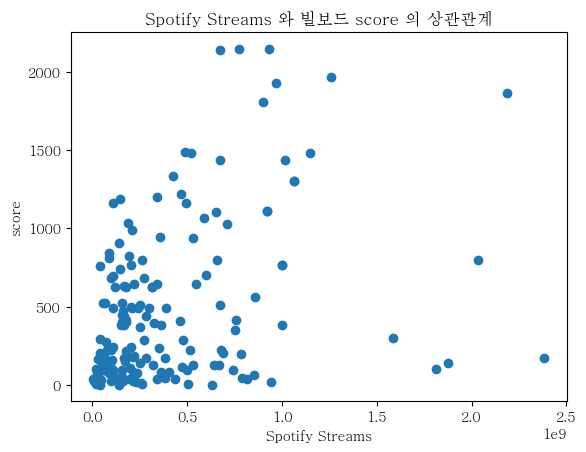

In [156]:
# Scatter plot 그리기
plt.scatter(dataDF['Spotify Streams'],dataDF['score'])
plt.xlabel('Spotify Streams')
plt.ylabel('score')
plt.title('Spotify Streams 와 빌보드 score 의 상관관계')

plt.show()

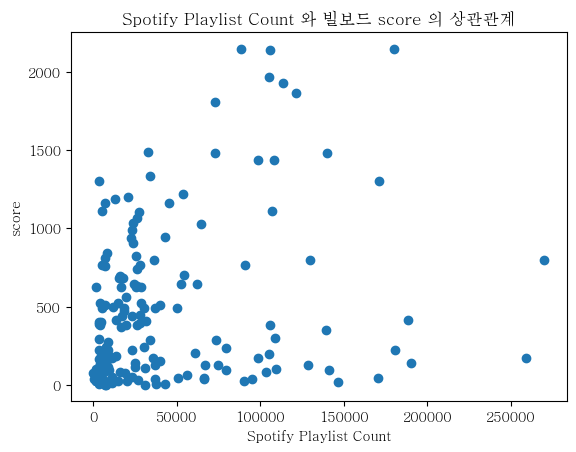

In [157]:
# Scatter plot 그리기
plt.scatter( dataDF['Spotify Playlist Count'],dataDF['score'])
plt.xlabel('Spotify Playlist Count')
plt.ylabel('score')
plt.title('Spotify Playlist Count 와 빌보드 score 의 상관관계')

plt.show()

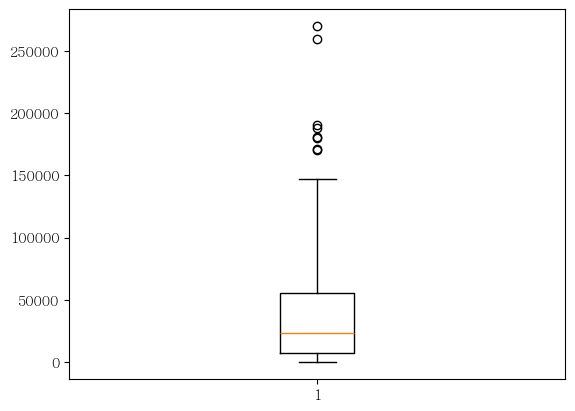

In [158]:
scoreplot=plt.boxplot(dataDF['Spotify Playlist Count'], whis= 2)
plt.show()

In [159]:
# 박스 그래프에서 받은 결과 확인
for k,v in scoreplot.items():
    print(k)
    for _ in v:
        print(_.get_data())

whiskers
(array([1, 1]), array([7199.75,   50.  ]))
(array([1, 1]), array([ 55660.75, 146801.  ]))
caps
(array([0.9625, 1.0375]), array([50., 50.]))
(array([0.9625, 1.0375]), array([146801., 146801.]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([ 7199.75,  7199.75, 55660.75, 55660.75,  7199.75]))
medians
(array([0.925, 1.075]), array([23299., 23299.]))
fliers
(array([1., 1., 1., 1., 1., 1., 1., 1.]), array([180309., 170890., 269802., 180810., 188142., 259202., 190202.,
       170553.]))
means


In [160]:
# 하위/상위 이상치 값 추출
outliers=scoreplot['caps']
low_outlier=outliers[0].get_data()[1].tolist()[0]
up_outlier=outliers[1].get_data()[1].tolist()[0]
low_outlier, up_outlier

(50.0, 146801.0)

In [161]:
# 이상치 처리
mask=(dataDF['Spotify Playlist Count']<low_outlier)|( dataDF['Spotify Playlist Count']>up_outlier)

In [162]:
dataDF[mask]

,score,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
lose control,2148,MEDUZA,9/27/2019,604.0,61.6,9.329111e+08,180309.0,53903360.0,66.0
paint the town red,1303,Doja Cat,8/4/2023,21.0,290.5,1.065399e+09,170890.0,121712197.0,78.0
flowers,800,Miley Cyrus,1/12/2023,4.0,444.9,2.031281e+09,269802.0,136569078.0,85.0
hell n back,224,Bakar,8/14/2019,1975.0,32.4,5.121941e+08,180810.0,58052469.0,71.0
fukumean,414,Gunna,6/15/2023,39.0,221.1,7.599987e+08,188142.0,80392612.0,80.0
all of me,171,John Legend,1/1/2012,487.0,69.8,2.382407e+09,259202.0,144805002.0,80.0
kill bill,138,SZA,12/8/2022,68.0,177.7,1.873747e+09,190202.0,99546318.0,82.0
jealous,47,Eyedress,12/6/2019,1615.0,36.5,7.894183e+08,170553.0,31361482.0,78.0


In [163]:
Track_Score = dataDF.sort_values(by='Track Score', ascending=False).head(20)
Track_Score



,score,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
million dollar baby,492,Tommy Richman,4/26/2024,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0
not like us,397,Kendrick Lamar,5/4/2024,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0
i like the way you kiss me,700,Artemas,3/19/2024,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0
flowers,800,Miley Cyrus,1/12/2023,4.0,444.9,2.031281e+09,269802.0,136569078.0,85.0
houdini,1164,Eminem,5/31/2024,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0
lovin on me,2142,Jack Harlow,11/10/2023,6.0,410.1,6.706654e+08,105892.0,175421034.0,83.0
beautiful things,1808,Benson Boone,1/18/2024,7.0,407.2,9.001588e+08,73118.0,201585714.0,86.0
gata only,510,FloyyMenor,2/2/2024,8.0,375.8,6.750792e+08,40094.0,211236940.0,92.0
lunch,187,Billie Eilish,5/17/2024,13.0,316.3,2.216362e+08,13800.0,197280692.0,92.0
like that,943,Future,3/22/2024,14.0,308.2,3.551864e+08,43025.0,108168634.0,88.0


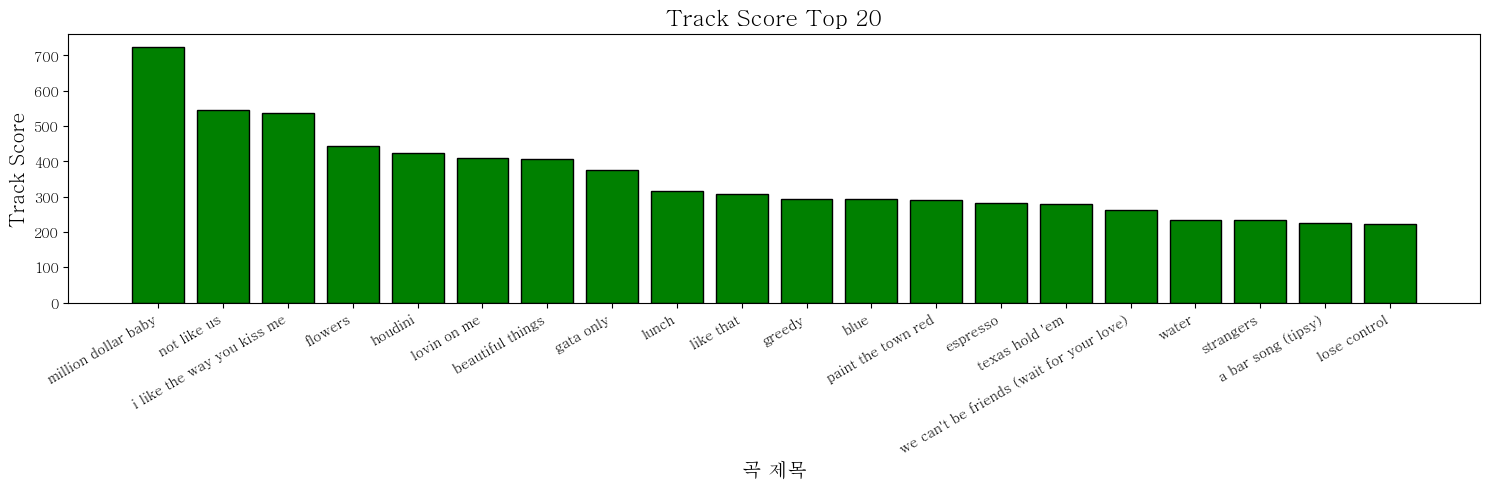

In [164]:
#  bar plot 생성
plt.figure(figsize=(15, 5))  # 그래프 크기를 더 크게 설정
plt.bar(Track_Score.index,Track_Score['Track Score'],color='green',edgecolor='black')     # 1등 22억 스트리밍횟수

plt.xlabel('곡 제목', fontsize=14)
plt.ylabel('Track Score', fontsize=14)
plt.title('Track Score Top 20', fontsize=16)
plt.xticks(ha='right',rotation=30)  # X축 레이블 회전
plt.subplots_adjust(bottom=0.2)  # 아래쪽 여백을 증가시켜 레이블과 축 사이의 공간을 확보
plt.tight_layout()  # 레이아웃 조정
plt.show()